## 机器学习

### 题目一、以鸢尾花数据集为例学习 SVM 
1. 加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42
2. 创建并训练 SVM 模型，使用线性核函数，随机种子42（也可以自己调试、体验不同参数的作用，选择更好的值，注释明确即可）
3. 使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果

In [21]:
#加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#创建并训练 SVM 模型，使用线性核函数，随机种子42
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
#使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### 题目二、以新闻数据分类为例 学习朴素贝叶斯
1. 导入库与数据集，数据集的导入方式：from sklearn.datasets import fetch_20newsgroups
2. 查看类别标签、数据集的描述、数据样本
3. 将文本数据转换为词袋模型
4. 将数据集分为训练集和测试集，训练集比例0.2，随机种子42
5. 创建并训练朴素贝叶斯分类器
6. 使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果
7. 横坐标为 Predicted，纵坐标为 Actual，画出混淆矩阵Confusion Matrix


In [26]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
newsgroups = fetch_20newsgroups(subset='all')
#查看类别标签、数据集的描述、数据样本
print("类别标签:", newsgroups.target_names)
print("数据集描述:", newsgroups.DESCR)
print("数据样本:")
print(newsgroups.data[0])

类别标签: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
数据集描述: .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.fea

In [27]:
#将文本数据转换为词袋模型
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
#将数据集分为训练集和测试集，训练集比例0.2，随机种子42
X_train, X_test, y_train, y_test = train_test_split(X, newsgroups.target, test_size=0.2, random_state=42)
#创建并训练朴素贝叶斯分类器
model = MultinomialNB()
model.fit(X_train, y_train)
#使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8504
Recall: 0.8455
F1 Score: 0.8367


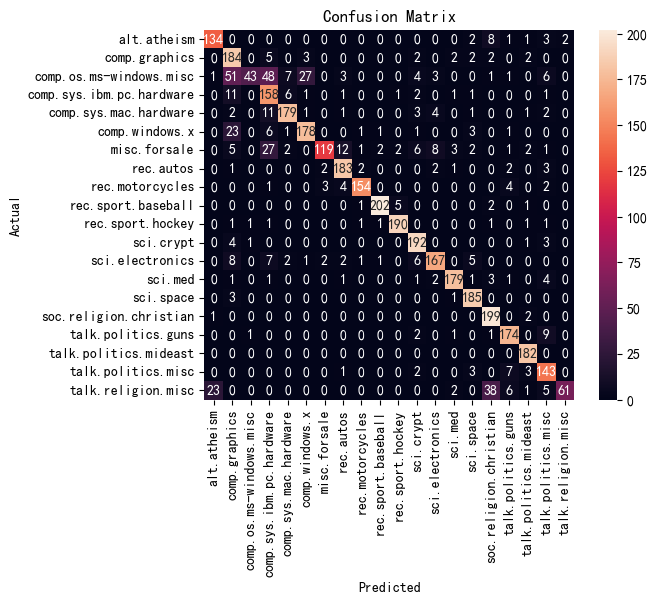

In [28]:
#横坐标为 Predicted，纵坐标为 Actual，画出混淆矩阵Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', square=True, xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 聚类分析

聚类是一种无监督学习的方法，旨在将数据集中的样本分组（或簇）成相似的集合，使得同一组内的样本相互之间更相似，而不同组之间的样本更不相似。

聚类是发现数据内在结构的一种方法，它能够帮助我们理解数据的组织、发现隐藏的模式以及从数据中提取有用的信息。

### 题目三、以鸢尾花数据集为例 学习k-means聚类
1. 导入数据集和聚类库
2. 使用k-means聚类，将数据分为3个簇，设置随机种子为0
3. PCA 降维到2维空间后，输出可视化结果
4. 尝试先降维，再聚类，再输出可视化结果，比较两次的不同
5. 使用轮廓系数比较聚类效果
6. 绘制轮廓系数与聚类数的关系图

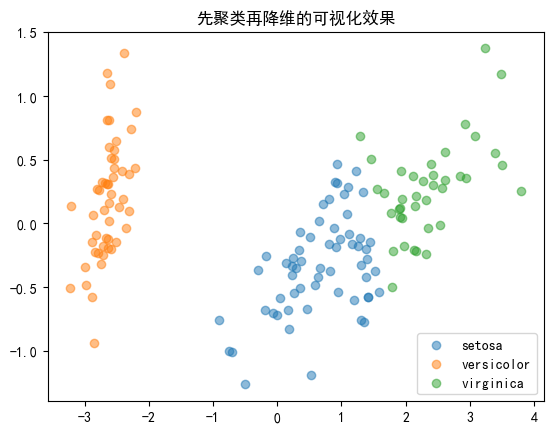

In [22]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams["axes.unicode_minus"] = False
# 使用k-means聚类，将数据分为3个簇，设置随机种子为0
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)
# PCA 降维到2维空间后，输出可视化结果
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
for i, class_label in enumerate(iris.target_names):
    plt.scatter(X_pca[y_kmeans==i,0],X_pca[y_kmeans ==i,1],label=class_label,alpha=0.5)
plt.title("先聚类再降维的可视化效果")
plt.legend(loc='lower right')
plt.show()

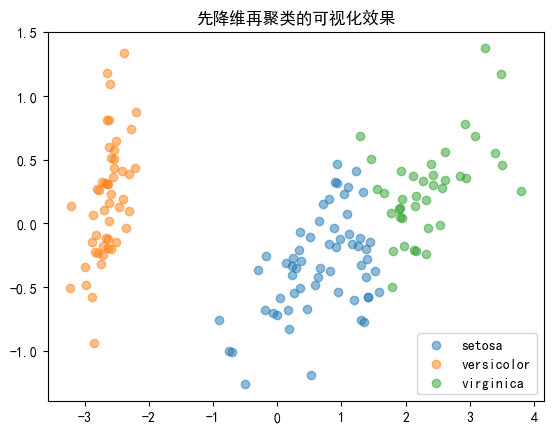

In [23]:
# 尝试先降维，再聚类，再输出可视化结果，比较两次的不同
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans_pca = kmeans.fit_predict(X_pca)
for i, class_label in enumerate(iris.target_names):
    plt.scatter(X_pca[y_kmeans_pca==i,0],X_pca[y_kmeans_pca ==i,1],label=class_label,alpha=0.5)
plt.title("先降维再聚类的可视化效果")
plt.legend(loc='lower right')
plt.show()

In [24]:
#使用轮廓系数比较聚类效果
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"不使用pca降维的轮廓系数: {silhouette_avg}")
silhouette_avg_pca = silhouette_score(X_pca, y_kmeans_pca)
print(f"使用pca降维后的轮廓系数: {silhouette_avg_pca}")

不使用pca降维的轮廓系数: 0.5511916046195919
使用pca降维后的轮廓系数: 0.5976764219547994


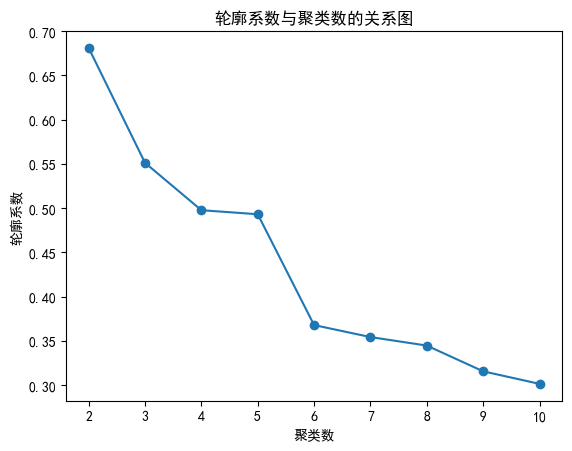

In [25]:
#绘制轮廓系数与聚类数的关系图
silhouette_scores = []
range_n_clusters = list(range(2, 11))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('轮廓系数与聚类数的关系图')
plt.xlabel('聚类数')
plt.ylabel('轮廓系数')
plt.show()